# MINING TWEETS: Topic Detection, Sentiment Analysis

In [29]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

tweets_df = pd.read_json('Twitter_SCRAPING/profile_tweets.json', lines=True)

In [2]:
# drop unnecessary columns
# contributors is empty; delete is not NaN only when the tweet actually does not exist; will remove these rows later; truncated infomation is of no interest
# retweet_count and retweeted; favorite_count and favorited; geo and coordinates, created_at and timestamp_ms contain the same information, not NaN when tweet text is not NaN
# entities contains data that is registered in other columns too (id, name etc.)
# str version of the same information contained in other columns (id_str, in_reply_to_status_id_str, in_reply_to_user_id_str, quoted_status_id_str)
tweets_df.drop(['geo', 'contributors', 'coordinates', 'created_at', 'delete', 'display_text_range', 'entities', 'extended_tweet', 'retweet_count', 'retweeted', 'favorite_count', 'favorited', 'truncated', 'id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status_id_str'],axis=1,inplace=True)               

In [3]:
tweets_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 19 columns):
extended_entities          2316 non-null object
filter_level               12389 non-null object
id                         12389 non-null float64
in_reply_to_screen_name    2633 non-null object
in_reply_to_status_id      2209 non-null float64
in_reply_to_user_id        2633 non-null float64
is_quote_status            12389 non-null float64
lang                       12389 non-null object
place                      209 non-null object
possibly_sensitive         6827 non-null float64
quote_count                2163 non-null float64
quoted_status              612 non-null object
quoted_status_id           612 non-null float64
reply_count                2163 non-null float64
retweeted_status           7330 non-null object
source                     12389 non-null object
text                       12389 non-null object
timestamp_ms               12389 non-null datetime64[ns]
user   

In [4]:
tweets_df.dropna(how='all', inplace=True)
tweets_df.reset_index(drop=True,inplace=True)

In [5]:
# take only english tweets
eng_df = tweets_df[tweets_df.lang == 'en']
eng_df=eng_df.reset_index()
eng_df=eng_df.drop(['index'], axis=1)
eng_df.head(2)

,extended_entities,filter_level,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,reply_count,retweeted_status,source,text,timestamp_ms,user
0,NaN,low,8.477330e+17,None,NaN,NaN,0.0,en,None,0.0,NaN,NaN,NaN,NaN,{'created_at': 'Thu Mar 30 20:17:52 +0000 2017...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @Lynn_Allen: Check out this cool short vide...,2017-03-31 08:51:20.365,"{'id': 425197705, 'id_str': '425197705', 'name..."
1,NaN,low,8.477357e+17,None,NaN,NaN,0.0,en,None,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Mar 30 18:19:10 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @BIMregScot: #BIMScotland network launch of...,2017-03-31 09:02:02.468,"{'id': 167155062, 'id_str': '167155062', 'name..."


In [6]:
from textcleaning import textCleaner, textCleanerFurther, textCleanLinks

In [7]:
eng_df['text'][6666]

'@BillDebevc Ok. You win. Happy now.'

In [8]:
# clean the tweets, create a list of clean tweets
import warnings
# beautiful soup raises UserWarning; disable this
warnings.filterwarnings("ignore", category=UserWarning, module="__main__")
%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(eng_df)):
    if( (i+1)%1000 == 0 ):
        print("Tweets", i+1, "of ", len(eng_df), "has been processed")                                                                   
    clean_tweet_texts.append(textCleaner(eng_df['text'][i]))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Cleaning the tweets...

Tweets 1000 of  11266 has been processed
Tweets 2000 of  11266 has been processed
Tweets 3000 of  11266 has been processed
Tweets 4000 of  11266 has been processed
Tweets 5000 of  11266 has been processed
Tweets 6000 of  11266 has been processed
Tweets 7000 of  11266 has been processed
Tweets 8000 of  11266 has been processed
Tweets 9000 of  11266 has been processed
Tweets 10000 of  11266 has been processed
Tweets 11000 of  11266 has been processed


In [9]:
# clean the tweets (remove hashtags, mentions, urls, create a list of clean tweets
%time
print("Cleaning the tweets...\n")
cleaner_tweet_texts = []
for i in range(0,len(clean_tweet_texts)):
    if( (i+1)%1000 == 0 ):
        print("Tweets", i+1, "of ", len(clean_tweet_texts), "has been processed")                                                                   
    cleaner_tweet_texts.append(textCleanerFurther(clean_tweet_texts[i]))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Cleaning the tweets...

Tweets 1000 of  11266 has been processed
Tweets 2000 of  11266 has been processed
Tweets 3000 of  11266 has been processed
Tweets 4000 of  11266 has been processed
Tweets 5000 of  11266 has been processed
Tweets 6000 of  11266 has been processed
Tweets 7000 of  11266 has been processed
Tweets 8000 of  11266 has been processed
Tweets 9000 of  11266 has been processed
Tweets 10000 of  11266 has been processed
Tweets 11000 of  11266 has been processed


In [10]:
# a third text column with only links removed, hashtags and mentions preserved

print("Cleaning the tweets, keeping hasthags and mentions, removing links...\n")
clean_tweet_texts_3 = []
%time
for i in range(0,len(eng_df)):
    if( (i+1)%100000 == 0 ):
        print("Tweets", i+1, "of ", len(eng_df), "has been processed")                                                                   
    clean_tweet_texts_3.append(textCleanLinks(eng_df['text'][i]))

Cleaning the tweets, keeping hasthags and mentions, removing links...

CPU times: user 4 µs, sys: 5 µs, total: 9 µs
Wall time: 8.82 µs


In [11]:
# create a new df from cleaned tweets and original columns
english_df = pd.DataFrame(np.column_stack([clean_tweet_texts, cleaner_tweet_texts, clean_tweet_texts_3]), 
                               columns=['text1', 'text2', 'text3'])

english_df['timestamp'] = eng_df.timestamp_ms
english_df['location'] = eng_df.place
english_df['lang'] = eng_df.lang
english_df['extra'] = eng_df.extended_entities
#clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
print('clean_df', len(english_df))
english_df.head(2)

clean_df 11266


,text1,text2,text3,timestamp,location,lang,extra
0,rt @lynn_allen check out this cool short video...,rt check out this cool short video on the hist...,rt lynn allen check out this cool short video ...,2017-03-31 08:51:20.365,None,en,NaN
1,rt @bimregscot #bimscotland network launch of ...,rt bimscotland network launch of the bim tech ...,rt bimregscot bimscotland network launch of th...,2017-03-31 09:02:02.468,None,en,NaN


In [12]:
# are there any empty text entries after cleaning?
null = (len(english_df[english_df.text2.isnull()]))
if null > 0:
    english_df[english_df.text2.isnull()].head()
else: 
    print(null, 'empty text entries')

0 empty text entries


## Zipf's Law

In [21]:
# Calculate terms frequencies

# count vectorizer to calculate the term frequencies; do not remove stopwords
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(english_df.text2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [22]:
eng_doc_matrix = cvec.transform(english_df.text2)
eng_tf = np.sum(eng_doc_matrix,axis=0)
terms = np.squeeze(np.asarray(eng_tf))
term_freq_df = pd.DataFrame([terms],columns=cvec.get_feature_names()).transpose() #term_freq_df is with stopwords
term_freq_df.columns = ['terms']
#term_freq_df.head()
term_freq_df.sort_values(by='terms', ascending=False).iloc[:10]

,terms
rt,6635
the,5605
to,4252
in,2826
of,2462
for,2002
and,1835
is,1824
you,1692
bim,1582


In [23]:
# write out term frequency to a file
term_freq_df.to_csv('Twitter_MINING/english_term-freq_df.csv',encoding='utf-8')

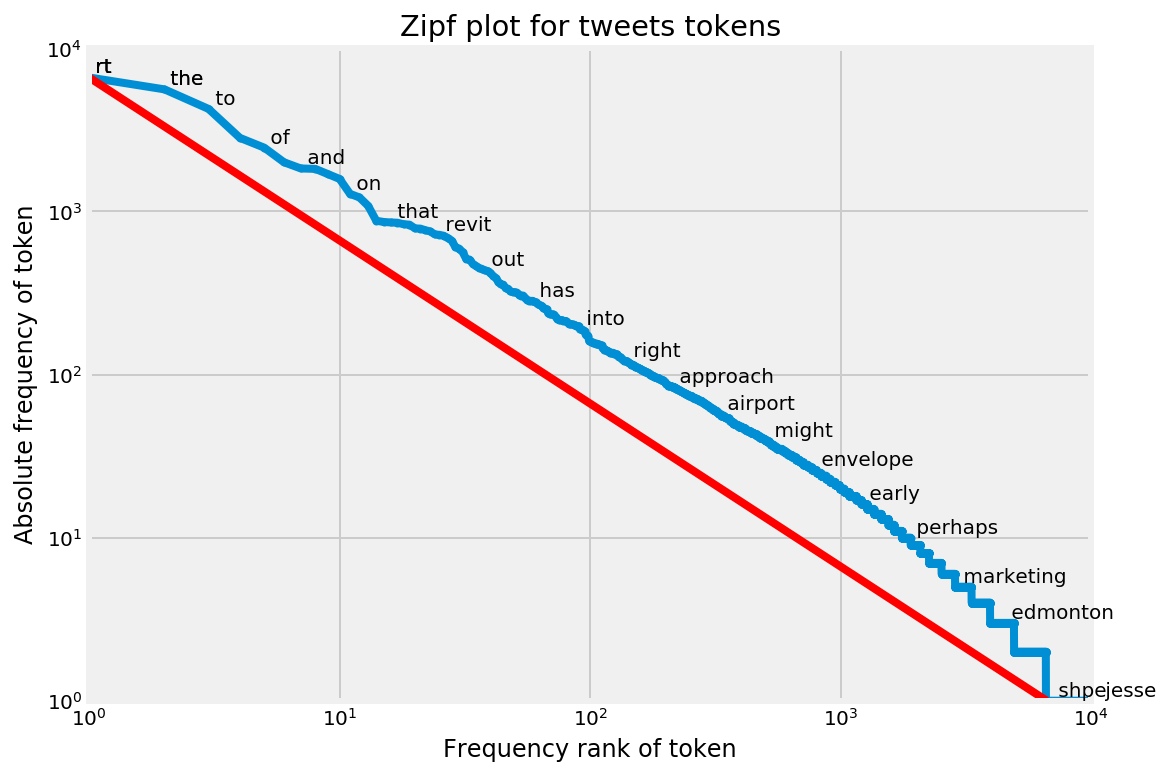

In [24]:
# Plot Zipf's law table

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import *
counts = term_freq_df.terms
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**4)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [25]:
# Calculate term frequencies without stop words

# First, add some Twitter specific words to the list of stopwords
from sklearn.feature_extraction import text
twitter_stop_words = ['rt', 'https', 'http', 'co']
stopwords = text.ENGLISH_STOP_WORDS.union(twitter_stop_words)

cvec = CountVectorizer(stop_words=stopwords,max_features=10000)
cvec.fit(english_df.text2)
document_matrix = cvec.transform(english_df.text2)

In [26]:
term_batches = np.linspace(0,11266,10).astype(int) # from 0 to 798179
i=0
eng_tf_stopped = []
while i < len(term_batches)-1:
    batch_result = np.sum(document_matrix[term_batches[i]:term_batches[i+1]].toarray(),axis=0)
    eng_tf_stopped.append(batch_result)
    print(term_batches[i+1],"entries' term freuquency calculated")
    i += 1

1251 entries' term freuquency calculated
2503 entries' term freuquency calculated
3755 entries' term freuquency calculated
5007 entries' term freuquency calculated
6258 entries' term freuquency calculated
7510 entries' term freuquency calculated
8762 entries' term freuquency calculated
10014 entries' term freuquency calculated
11266 entries' term freuquency calculated


In [27]:
terms_stopped = np.sum(eng_tf_stopped,axis=0)
term_freq_df_stopped = pd.DataFrame([terms_stopped],columns=cvec.get_feature_names()).transpose() # term_freq_df2 is without stopwords
term_freq_df_stopped.columns = ['terms']
term_freq_df_stopped.sort_values(by='terms', ascending=False).iloc[:10]

,terms
bim,1582
construction,830
revit,719
new,663
design,562
autocad,451
building,391
help,336
world,320
architecture,309


## Corpus vectorization

### Word2Vec model

https://rare-technologies.com/word2vec-tutorial/

In [30]:
import gensim
# X is a list of tokenized texts (i.e. list of lists of tokens)
X = [word_tokenize(item) for item in english_df['text2'].tolist()]
#print(X[0:3])
model = gensim.models.Word2Vec(X, iter=5, min_count=20, size=200) # min_count: how many times a word appears in the corpus
#model.accuracy('a question')

In [31]:
# check the model
# one word matrix
model.wv['bim']

array([-0.17050791, -0.15509115, -0.24395216, -0.09152453, -0.09465941,
        0.1053382 ,  0.19352703,  0.17721316,  0.15263893, -0.19061103,
       -0.2282606 ,  0.01323022, -0.05351086,  0.1707163 , -0.24671972,
       -0.14518774, -0.14445503, -0.02137402, -0.07919776, -0.33633524,
       -0.00165023, -0.15326753,  0.11264034,  0.38209024,  0.0604923 ,
       -0.13988635,  0.1193909 , -0.27251497, -0.3285287 , -0.19743153,
        0.30504426, -0.05606553, -0.19323935,  0.38516057, -0.01183338,
       -0.15324497,  0.11570998, -0.00635404, -0.0063299 ,  0.23823409,
       -0.00446444,  0.15016782,  0.15596543, -0.1174079 ,  0.13718525,
        0.21202245,  0.00046066,  0.11854513,  0.24642074, -0.10612255,
       -0.07372969, -0.17442289, -0.14880389, -0.22856987, -0.12624365,
       -0.27518722, -0.09943735,  0.08108626, -0.07321072, -0.09766417,
       -0.11271435, -0.03419706,  0.031842  , -0.05734137,  0.17026988,
       -0.3166191 ,  0.03670062,  0.10605934,  0.38061953,  0.18

#### Arithmetic operations and similarities within the model

In [32]:
# find 10 words closest to "digital"
model.wv.most_similar(positive=["digital"], topn=12)

[('infrastructure', 0.9992307424545288),
 ('dprinting', 0.9992274045944214),
 ('data', 0.9990618228912354),
 ('art', 0.9987481832504272),
 ('trends', 0.9986473917961121),
 ('method', 0.998507022857666),
 ('healthcare', 0.9985049962997437),
 ('latest', 0.9983865022659302),
 ('hub', 0.9983761310577393),
 ('innovation', 0.9983594417572021),
 ('project', 0.9983194470405579),
 ('reference', 0.9982370138168335)]

In [33]:
# find 10 words closest to "digital"
model.wv.most_similar(positive=["environment"], topn=12)

[('uk', 0.9996206760406494),
 ('history', 0.9995514154434204),
 ('report', 0.9994291067123413),
 ('vast', 0.9994221925735474),
 ('study', 0.999397337436676),
 ('incredible', 0.9993789196014404),
 ('recently', 0.9993734359741211),
 ('global', 0.9993587732315063),
 ('irish', 0.9993540048599243),
 ('smart', 0.999350905418396),
 ('series', 0.9993422031402588),
 ('floor', 0.9993389248847961)]

In [34]:
# find the word most similar to the positive list and oposite of negative
model.wv.most_similar(positive=['architecture', 'digital'], negative=['hand'], topn=1)

[('building', 0.9892473816871643)]

In [35]:
model.wv.similarity('digital','infrastructure')

0.9992307446093642

In [36]:
# write out the vector file
# for each word in the vocabulary, write out the word vectors
from io import StringIO
fvec = open("Twitter_MINING/english_df_vectors.txt", 'w')
for word in model.wv.vocab.keys():
    vec = model.wv[word]
    for i in range(vec.shape[0]):
        s = StringIO()
    np.savetxt(s, vec, fmt="%.5f", newline=",")
    #print(type(s))
    fvec.write("%s%s\n" % (s.getvalue(), word))
fvec.close()

In [37]:
print(np.array([model.wv['digital']]).shape)
# use this value to match the shape of arr in the following function

(1, 200)


In [39]:
# USING TSNE TO DISPLAY SIMILAR WORDS IN THE WORD2VEC MODEL
# https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
from sklearn.manifold import TSNE

# display model funciton
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,200), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.most_similar(positive=[word], topn=100)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(12,8)) # set size so it can be directly saved !
    plt.rc('font', size=10)
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

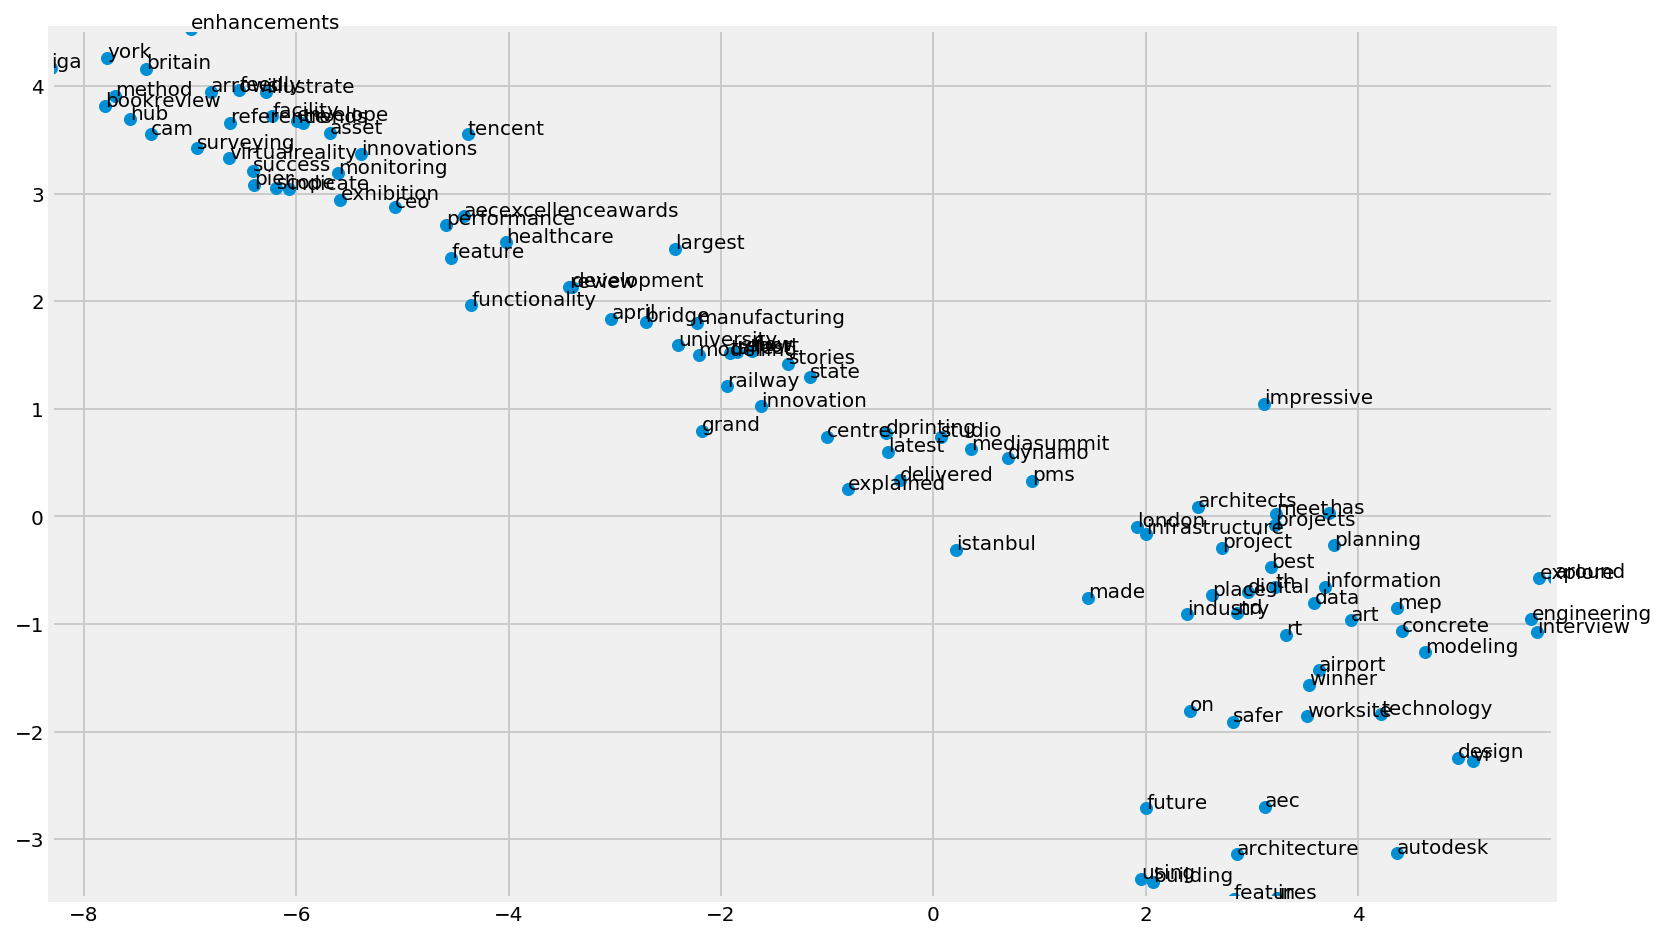

In [40]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

display_closestwords_tsnescatterplot(model, 'architecture')

### LDA, NMF, LSI clustering

#### Topic Modeling with Scikit Learn
Anesha Bakharia, https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

In [41]:
# preprocess dataset
# remove stopwords
# create bag-of-words from the top 1000 words
# LDA and NWM analysis, limit emerging topics to 20 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

# improved display_topics function, returns both Top Words and Documents in a Topic
# https://towardsdatascience.com/improving-the-interpretation-of-topic-models-87fd2ee3847d
def display_topics(H, W, feature_names, docs, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print("KEYWORDS", " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        # good for checking which documents are the most characteristic for certain topics
        for doc_index in top_doc_indices:
            print("TOP DOCS", docs[doc_index])

In [42]:
# tweets dataset
tweets_list = english_df['text2'].tolist()

In [43]:
no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweets_list)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(tweets_list)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 15

# Run NMF
%time
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

# Run LDA
%time
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

no_top_words = 12
no_top_documents = 2

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [235]:
display_topics(nmf_H, nmf_W, tfidf_feature_names, tweets_list, no_top_words, no_top_documents)

Topic 0:
KEYWORDS rt https math like people future day today looking look
TOP DOCS rt tgif listen to gsapp conversations podcast no hilary sample in conversation with dean amale andraos
TOP DOCS rt turei treatment highlights lie in our claim to be representative
Topic 1:
KEYWORDS bim using mean aec people model process explains minute read
TOP DOCS the bim dictionary will be progressively translated into at least languages in
TOP DOCS thanks pls cite bim thinkspace as bim thinkspace and bim framework as bim framework the bibliography
Topic 2:
KEYWORDS revit autodesk features dynamo webinar join pms functionality directly hear
TOP DOCS found my lost phone revit
TOP DOCS revit constrained rebar revit
Topic 3:
KEYWORDS autocad tbt fun fact included released tape cassette audio years
TOP DOCS fun fact released in autocad included an audio cassette tape autocad tbt
TOP DOCS rt fun fact released in autocad included an audio cassette tape autocad tbt
Topic 4:
KEYWORDS au class open vegas regi

In [252]:
display_topics(lda_H, lda_W, tf_feature_names, tweets_list, no_top_words, no_top_documents)

Topic 0:
KEYWORDS rt latest architect experts ale post don fusion talk week minutes tomorrow
TOP DOCS rt generativedesign as an architect the workspace aims to please everyone
TOP DOCS rt generativedesign as an architect the workspace aims to please everyone
Topic 1:
KEYWORDS rt best structural years tech ve concrete sf home easier support job
TOP DOCS difference between job and career is the clock tells you when to go home from your job
TOP DOCS rt feeling super proud that won the award best corporate workplace bcoawards officedesign
Topic 2:
KEYWORDS rt learn reality digital does did way model going engineering impressive mean
TOP DOCS rt going digital bentley advances reality modeling to extend the scope of engineering surveying value
TOP DOCS rt going digital bentley advances reality modeling to extend the scope of engineering surveying value
Topic 3:
KEYWORDS rt aec vr know build hi hear good live md let models
TOP DOCS sorry to hear you are having trouble what specifically is hap

#### From Complete Guide to TOPIC MODELING (LDA, scikit-learn)
https://nlpforhackers.io/topic-modeling/

In [44]:
# data to work with: list of tweets
tweets_list = english_df['text2'].tolist()

In [45]:
# add some Twitter specific words to the list of stopwords
from sklearn.feature_extraction import text
twitter_stop_words = ['rt']
STOPWORDS = text.ENGLISH_STOP_WORDS.union(twitter_stop_words)

##### GENSIM LDA and LSI
(Complete guide, https://nlpforhackers.io/topic-modeling/)

In [47]:
import re 
NUM_TOPICS = 10

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
# Tokenize the data and filter out stopwords
CG_tokenized_data = []
for text in tweets_list:
    CG_tokenized_data.append(clean_text(text))

# Build a Dictionary - association word to numeric id
CG_dictionary = gensim.corpora.Dictionary(CG_tokenized_data)
 
# Transform the collection of texts to a numerical form
CG_corpus = [CG_dictionary.doc2bow(text) for text in CG_tokenized_data]
 
# Look at the e.g. 77th document: [(word_id, count), ...]
print(CG_corpus[77])

[(4, 1), (235, 1), (236, 1), (237, 1), (238, 1)]


In [48]:
import logging, bigfloat
bigfloat.exp(5000,bigfloat.precision(100))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
np.seterr(all='ignore')  
# Build the LDA model
lda_model = gensim.models.LdaModel(corpus=CG_corpus, iterations=100, passes=2, num_topics=NUM_TOPICS, id2word=CG_dictionary, dtype=np.float64)

2020-01-15 15:05:30,770 : INFO : using symmetric alpha at 0.1
2020-01-15 15:05:30,771 : INFO : using symmetric eta at 0.1
2020-01-15 15:05:30,777 : INFO : using serial LDA version on this node
2020-01-15 15:05:30,792 : INFO : running online (multi-pass) LDA training, 10 topics, 2 passes over the supplied corpus of 11266 documents, updating model once every 2000 documents, evaluating perplexity every 11266 documents, iterating 100x with a convergence threshold of 0.001000
2020-01-15 15:05:30,793 : INFO : PROGRESS: pass 0, at document #2000/11266
2020-01-15 15:05:31,646 : INFO : merging changes from 2000 documents into a model of 11266 documents
2020-01-15 15:05:31,663 : INFO : topic #4 (0.100): 0.019*"design" + 0.016*"using" + 0.013*"bim" + 0.009*"make" + 0.008*"random" + 0.007*"world" + 0.007*"buildings" + 0.007*"thanks" + 0.006*"future" + 0.006*"reactive"
2020-01-15 15:05:31,664 : INFO : topic #0 (0.100): 0.016*"steel" + 0.014*"congratulations" + 0.013*"new" + 0.013*"marchcadness" + 0

2020-01-15 15:05:35,734 : INFO : topic #3 (0.100): 0.024*"bim" + 0.024*"construction" + 0.018*"play" + 0.014*"thanks" + 0.013*"design" + 0.011*"collection" + 0.010*"just" + 0.009*"workflows" + 0.009*"latest" + 0.009*"things"
2020-01-15 15:05:35,738 : INFO : topic diff=0.482018, rho=0.408248
2020-01-15 15:05:35,743 : INFO : PROGRESS: pass 1, at document #2000/11266
2020-01-15 15:05:36,376 : INFO : merging changes from 2000 documents into a model of 11266 documents
2020-01-15 15:05:36,400 : INFO : topic #0 (0.100): 0.039*"new" + 0.018*"autodesk" + 0.017*"revit" + 0.011*"line" + 0.011*"construction" + 0.011*"photo" + 0.011*"steel" + 0.009*"use" + 0.009*"house" + 0.008*"watch"
2020-01-15 15:05:36,401 : INFO : topic #4 (0.100): 0.029*"design" + 0.022*"make" + 0.017*"autocad" + 0.016*"help" + 0.011*"change" + 0.009*"work" + 0.009*"future" + 0.009*"passivhaus" + 0.008*"software" + 0.007*"using"
2020-01-15 15:05:36,403 : INFO : topic #3 (0.100): 0.025*"bim" + 0.018*"construction" + 0.013*"than

2020-01-15 15:05:39,399 : INFO : topic diff=0.236993, rho=0.361953


In [49]:
# Build the LSI model
lsi_model = gensim.models.LsiModel(corpus=CG_corpus, num_topics=NUM_TOPICS, id2word=CG_dictionary)

2020-01-15 15:05:42,001 : INFO : using serial LSI version on this node
2020-01-15 15:05:42,003 : INFO : updating model with new documents
2020-01-15 15:05:42,010 : INFO : preparing a new chunk of documents
2020-01-15 15:05:42,094 : INFO : using 100 extra samples and 2 power iterations
2020-01-15 15:05:42,100 : INFO : 1st phase: constructing (10270, 110) action matrix
2020-01-15 15:05:42,221 : INFO : orthonormalizing (10270, 110) action matrix
2020-01-15 15:05:42,476 : INFO : 2nd phase: running dense svd on (110, 11266) matrix
2020-01-15 15:05:42,634 : INFO : computing the final decomposition
2020-01-15 15:05:42,635 : INFO : keeping 10 factors (discarding 67.063% of energy spectrum)
2020-01-15 15:05:42,647 : INFO : processed documents up to #11266
2020-01-15 15:05:42,650 : INFO : topic #0(47.793): 0.908*"bim" + 0.221*"construction" + 0.140*"revit" + 0.122*"new" + 0.084*"using" + 0.079*"building" + 0.068*"video" + 0.063*"design" + 0.054*"aec" + 0.050*"people"
2020-01-15 15:05:42,658 : IN

In [51]:
print("LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
 
print("=" * 20)
 
print("LSI Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 10))
 
print("=" * 20)

LDA Model:
Topic #0: 0.046*"new" + 0.020*"revit" + 0.018*"construction" + 0.016*"autodesk" + 0.011*"use" + 0.011*"house" + 0.010*"line" + 0.010*"watch" + 0.010*"architecture" + 0.010*"bim"
Topic #1: 0.017*"built" + 0.015*"photos" + 0.012*"photogrammetry" + 0.011*"environment" + 0.010*"concrete" + 0.009*"cloud" + 0.009*"photo" + 0.009*"asset" + 0.008*"services" + 0.008*"aerial"
Topic #2: 0.019*"open" + 0.017*"construction" + 0.017*"explorer" + 0.016*"bim" + 0.014*"building" + 0.012*"watch" + 0.009*"tech" + 0.008*"look" + 0.008*"work" + 0.008*"ratti"
Topic #3: 0.024*"bim" + 0.023*"construction" + 0.017*"play" + 0.015*"thanks" + 0.012*"design" + 0.011*"collection" + 0.010*"things" + 0.009*"latest" + 0.009*"digital" + 0.009*"just"
Topic #4: 0.031*"design" + 0.025*"make" + 0.024*"help" + 0.018*"autocad" + 0.012*"passivhaus" + 0.012*"software" + 0.011*"change" + 0.011*"work" + 0.008*"future" + 0.008*"easier"
Topic #5: 0.019*"like" + 0.014*"used" + 0.009*"printed" + 0.009*"come" + 0.008*"math

In [52]:
# fit unseen text
y = "How architects talk about digital infrastructures in social media"
bow = dictionary.doc2bow(clean_text(y))
 
print(lsi_model[bow]) 
 
print(lda_model[bow])

NameError: name 'dictionary' is not defined

In [53]:
lda_index = gensim.similarities.MatrixSimilarity(lda_model[CG_corpus], num_features=500)
 
# Let's perform some queries
similarities = lda_index[lda_model[bow]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])
# [(104, 0.87591344), (178, 0.86124849), (31, 0.8604598), (77, 0.84932965), (85, 0.84843522), (135, 0.84421808), (215, 0.84184396), (353, 0.84038532), (254, 0.83498049), (13, 0.82832891)]
 
# Let's see what's the most similar document
document_id, similarity = similarities[0]
print(tweets_list[document_id][:1000])

2020-01-15 15:06:07,919 : INFO : creating matrix with 11266 documents and 500 features


NameError: name 'bow' is not defined

##### SCIKIT-LEARN LDA
(Complete Guide, https://nlpforhackers.io/topic-modeling/)

In [57]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 10

CG_vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words=STOPWORDS, lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
tweets_vectorized = CG_vectorizer.fit_transform(tweets_list)

In [58]:
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(tweets_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

(11266, 10)


In [59]:
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(tweets_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

(11266, 10)


In [60]:
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(tweets_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

(11266, 10)


In [61]:
# Let's see how the first document in the corpus looks like in different topic spaces
print(lda_Z[0])
print(nmf_Z[0])
print(lsi_Z[0])

[0.01111128 0.01111121 0.01111111 0.01111311 0.01111111 0.01111111
 0.01111125 0.01111111 0.01111111 0.89999758]
[0.00245195 0.00503471 0.00306822 0.02483982 0.         0.19563579
 0.00271425 0.00155305 0.         0.        ]
[ 0.16008898  0.19104584  0.04027768  0.2511927   0.28371686  0.74641294
  0.12960264  0.01933737 -0.56478631 -0.28575336]


In [62]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, CG_vectorizer)
print("=" * 20)
 
print("NMF Model:")
print_topics(nmf_model, CG_vectorizer)
print("=" * 20)
 
print("LSI Model:")
print_topics(lsi_model, CG_vectorizer)
print("=" * 20)

LDA Model:
Topic 0:
[('make', 265.3900984936752), ('time', 227.89244558467993), ('thanks', 217.94966221890917), ('aec', 211.63410983588074), ('better', 99.21526426386394), ('design', 98.91572838684337), ('sorry', 91.86736095801203), ('collection', 88.31332568563147), ('art', 86.02147550629155), ('sign', 77.23719804204057)]
Topic 1:
[('like', 209.57436035881224), ('day', 131.9319865686288), ('change', 113.31000331114052), ('year', 110.51160795395239), ('pay', 107.42938600453073), ('vector', 102.2460627327139), ('thoughts', 101.98681218025084), ('meet', 101.60674426549001), ('way', 92.8806088675339), ('infrastructure', 79.37171098380018)]
Topic 2:
[('learn', 211.85458884071733), ('know', 200.8861449588756), ('look', 193.2588864796582), ('want', 153.7675473431503), ('help', 126.1875875061443), ('issues', 121.08028858808345), ('good', 120.28851835603753), ('built', 113.50202246392892), ('love', 110.04196095479504), ('math', 92.12028698754642)]
Topic 3:
[('bim', 1270.9480829757729), ('const

[('new', 0.7870426143046408), ('design', 0.16561864069094068), ('watch', 0.05897445835700555), ('just', 0.05658893841330978), ('edinburgh', 0.05478060030233518), ('york', 0.05350961145815514), ('delivered', 0.052020712445812), ('high', 0.03812938008472541), ('art', 0.03609074789814147), ('facility', 0.03478998686469706)]
Topic 7:
[('field', 0.7878783402493353), ('play', 0.36219710366168933), ('explorer', 0.3409345698570262), ('vector', 0.33913900475383474), ('look', 0.03507206781077774), ('new', 0.03498722159776621), ('half', 0.029450160079570378), ('stem', 0.02916587251821027), ('graduates', 0.02847902874168434), ('computerscience', 0.028410247167755268)]
Topic 8:
[('make', 0.4758866803694398), ('world', 0.33450726296933103), ('autodesk', 0.2773163348947819), ('software', 0.23128169671191065), ('use', 0.22974478729743608), ('reality', 0.19599068491495186), ('ideas', 0.17461000777905536), ('students', 0.17238557032074153), ('new', 0.14811223773826676), ('work', 0.04790998105433003)]
To

In [63]:
# fit unseen document
text = "How architects talk about digital infrastructures in social media"
x = nmf_model.transform(CG_vectorizer.transform([text]))[0]
print(x)

[0.00348642 0.00021824 0.         0.00503688 0.00042253 0.01325384
 0.00473429 0.         0.00472319 0.00035007]


In [64]:
# similarity
from sklearn.metrics.pairwise import euclidean_distances
 
def most_similar(x, Z, top_n=5):
    dists = euclidean_distances(x.reshape(1, -1), Z)
    pairs = enumerate(dists[0])
    most_similar = sorted(pairs, key=lambda item: item[1])[:top_n]
    return most_similar
 
similarities = most_similar(x, nmf_Z)
document_id, similarity = similarities[0]
print(tweets_list[document_id][:1000])

better way to code introducing the integrated discovery environment


##### PLOT RESULTS

In [54]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [65]:
# plotting documents in 2D
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(tweets_vectorized)
 
CG_df = pd.DataFrame(columns=['x', 'y', 'document'])
CG_df['x'], CG_df['y'], CG_df['document'] = documents_2d[:,0], documents_2d[:,1], range(len(tweets_list))
 
source = ColumnDataSource(ColumnDataSource.from_df(CG_df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [66]:
# plotting words in 2D
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(tweets_vectorized.T)
 
CG_df1 = pd.DataFrame(columns=['x', 'y', 'word'])
CG_df1['x'], CG_df1['y'], CG_df1['word'] = words_2d[:,0], words_2d[:,1], CG_vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(CG_df1))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [67]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tweets_vectorized, CG_vectorizer, mds='tsne')
panel

/Users/zoza/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
3      15.883486        1       1  169.020554 -214.451218
6      11.151172        1       2 -196.456619 -138.009430
0       9.995358        1       3  -27.789579 -226.514465
5       9.894832        1       4   77.433884  -90.596626
9       9.647831        1       5  223.191299  -16.729006
4       9.334311        1       6  -44.205486  190.411850
7       9.050257        1       7   38.862198   56.499336
1       9.047378        1       8  160.170578  155.259949
2       8.080525        1       9 -176.412354   68.221008
8       7.914849        1      10  -69.053223  -50.245770, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
261   Default  1408.000000           bim  1408.000000  30.0000  30.0000
2247  Default   691.000000         revit   691.000000  29.0000  29.0000
562   Default   808.000000  construction   808.000000  28.0000  28.0000
179   Default   423.000000       autocad   423.000000  27.0000  27.0000
334   Default   386.000000      building   386.000000  26.0000  26.0000
1457  Default   267.000000          just   267.000000  25.0000  25.0000
133   Default   287.000000  architecture   287.000000  24.0000  24.0000
1612  Default   257.000000          make   257.000000  23.0000  23.0000
1514  Default   206.000000         learn   206.000000  22.0000  22.0000
2966  Default   279.000000         world   279.000000  21.0000  21.0000
2697  Default   221.000000          time   221.000000  20.0000  20.0000
2954  Default   205.000000          work   205.000000  19.0000  19.0000
1473  Default   195.000000          know   195.000000  18.0000  18.0000
2666  Default   211.000000        thanks   211.000000  17.0000  17.0000
1574  Default   188.000000          look   188.000000  16.0000  16.0000
46    Default   205.000000           aec   205.000000  15.0000  15.0000
713   Default   537.000000        design   537.000000  14.0000  14.0000
2891  Default   198.000000         watch   198.000000  13.0000  13.0000
1928  Default   249.000000        people   249.000000  12.0000  12.0000
1193  Default   243.000000         great   243.000000  11.0000  11.0000
1547  Default   218.000000          like   218.000000  10.0000  10.0000
1032  Default   244.000000         field   244.000000   9.0000   9.0000
1911  Default   194.000000    passivhaus   194.000000   8.0000   8.0000
2706  Default   165.000000         today   165.000000   7.0000   7.0000
1255  Default   314.000000          help   314.000000   6.0000   6.0000
2820  Default   255.000000         using   255.000000   5.0000   5.0000
247   Default   153.000000          best   153.000000   4.0000   4.0000
1787  Default   608.000000           new   608.000000   3.0000   3.0000
2879  Default   150.000000          want   150.000000   2.0000   2.0000
180   Default   269.000000      autodesk   269.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
2558  Topic10    85.729632      students    86.597869   2.5264  -4.1293
1264  Topic10    84.769534          high    85.637727   2.5262  -4.1406
2914  Topic10    64.496467       welcome    65.364622   2.5231  -4.4139
2055  Topic10    62.558717       problem    63.435325   2.5225  -4.4444
2415  Topic10    60.102290        simple    60.970560   2.5221  -4.4845
694   Topic10    57.793825     delivered    58.662022   2.5215  -4.5237
2759  Topic10    55.345675           try    56.215269   2.5208  -4.5669
465   Topic10    53.620623         click    54.488898   2.5204  -4.5986
1428  Topic10    47.172770         irish    48.040975   2.5182  -4.7267
1759  Topic10    46.943212           mur    47.811402   2.5181  -4.7316
1654  Topic10    45.460850          maya    46.360989   2.5168  -4.7637
1985  Topic10    40.921018         point    41.789225   2.5154  -4.8689
1015  Topic10    38.7

## SOM

### SOMPY implementation 

https://github.com/sevamoo/data_driven_modeling_2018/blob/master/04_Clustering_Kmeans_SOM_20180327.ipynb

In [13]:
import sompylib3.sompy as SOM
msz11 =53
msz10 = 53
M = model.wv.vectors
som1 = SOM.SOM('', M, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')


Total time elapsed: 55.810000 secodns
final quantization error: 1.325659


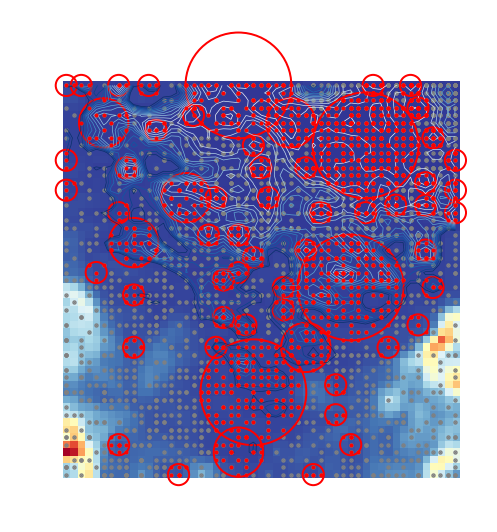

In [26]:
U = som1.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='No', save='NO', save_dir='')

In [ ]:
import matplotlib.pyplot as plt

codebook1 = som1.codebook[:]
codebook1_n = SOM.denormalize_by(som1.data_raw, codebook1, n_method = 'var')

fig = plt.figure()
plt.plot(M[:,0],M[:,1],'ok',alpha=0.4, markersize=4);
K = som1.nnodes
for k in range(som1.nnodes):
    plt.plot(codebook1_n[k,0],codebook1_n[k,1],marker='o',markersize=4,alpha=1.,color=plt.cm.RdYlBu_r(float(k)/K));
fig.set_size_inches(10,10)

In [17]:
# train SOM on documents instead of words

class LabeledLineSentence(object):

    def __init__(self, doc_list, labels_list):

        self.labels_list = labels_list
        self.doc_list = doc_list

    def __iter__(self):

        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.TaggedDocument(doc,[self.labels_list[idx]])

it = LabeledLineSentence(X, tweets_list) # first value list of lists of words; second value list of 'labels' which here are actual tweets
docmodel = gensim.models.Doc2Vec(vector_size=300, min_count=0, alpha=0.025, min_alpha=0.025)
docmodel.build_vocab(it)

In [ ]:
# training of model
for epoch in range(10):
    print('iteration '+str(epoch+1))
    docmodel.train(it, total_examples=docmodel.corpus_count, epochs=1)
    docmodel.alpha -= 0.002
    docmodel.min_alpha = docmodel.alpha

In [29]:
# train the SOM on the doc2vec model
msz11 = 53
msz10 = 53
DM = docmodel.docvecs.vectors_docs
som2 = SOM.SOM('', DM, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som2.init_map()
som2.train(n_job = 1, shared_memory = 'no',verbose='final')


Total time elapsed: 41.002000 secodns
final quantization error: 4.318200


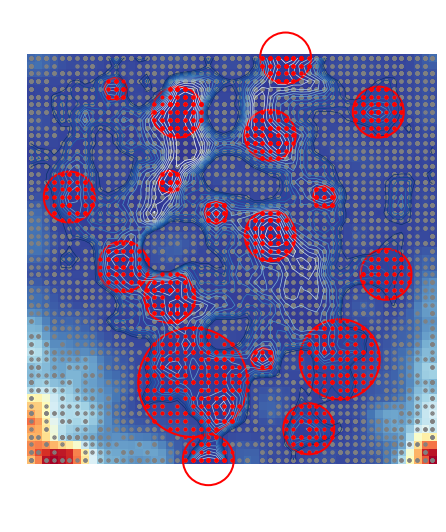

In [30]:
U2 = som2.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='Yes', save='NO', save_dir='')

In [ ]:
# show the codebook
codebook2 = som2.codebook[:]
codebook2_n = SOM.denormalize_by(som2.data_raw, codebook2, n_method = 'var')

fig = plt.figure()
plt.plot(DM[:,0],DM[:,1],'ok',alpha=0.4, markersize=4);
K = som2.nnodes
for k in range(som1.nnodes):
    plt.plot(codebook2_n[k,0],codebook2_n[k,1],marker='o',markersize=4,alpha=1.,color=plt.cm.RdYlBu_r(float(k)/K));
fig.set_size_inches(10,10)

### USING TSNE TO DISPLAY WORD CLUSTERING IN THE WORD2VEC MODEL

https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229


In [69]:
# plot all words in the model
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

from sklearn.manifold import TSNE
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

tsne_plot(model)